### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')

In [9]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [12]:
missing_values = data.isnull().sum()

missing_values[missing_values > 0]

car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [15]:
data_cleaned = data.dropna()

4. What proportion of the total observations chose to accept the coupon?



In [18]:
acceptance_rate = data['Y'].mean()
print(f"Proportion of accepted coupons: {acceptance_rate:.2%}")

Proportion of accepted coupons: 56.84%


5. Use a bar plot to visualize the `coupon` column.

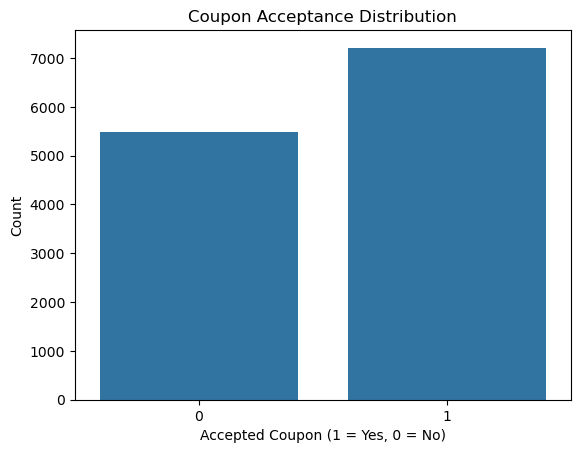

In [21]:
sns.countplot(x='Y', data=data)
plt.xlabel('Accepted Coupon (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.title('Coupon Acceptance Distribution')
plt.show()

6. Use a histogram to visualize the temperature column.

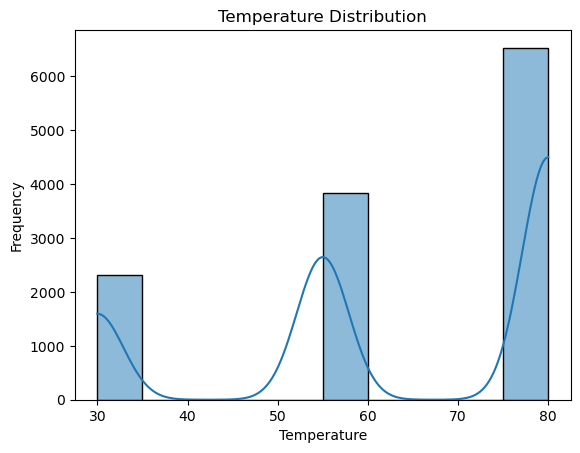

In [24]:
# Histogram of temperature
sns.histplot(data['temperature'], bins=10, kde=True)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [31]:
# Filter dataset to include only bar-related coupons
bar_coupons = data[data['coupon'] == 'Bar']

# Displaying first few rows
bar_coupons.head(10)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
61,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,1,0,1,0
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1


2. What proportion of bar coupons were accepted?


In [34]:
# Calculate acceptance rate
bar_acceptance_rate = bar_coupons['Y'].mean()
print(f"Proportion of accepted bar coupons: {bar_acceptance_rate:.2%}")

Proportion of accepted bar coupons: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [37]:
# Ensure bar_coupons is a full independent copy
bar_coupons = data[data['coupon'] == 'Bar'].copy()

# Map bar visit frequency into two groups
bar_coupons['bar_frequency_group'] = bar_coupons['Bar'].apply(
    lambda x: '≤3 times' if x in ['never', 'less1', '1~3'] else '>3 times' if x in ['4~8', 'gt8'] else 'Unknown'
)

# Calculate acceptance rates for both groups
bar_acceptance_by_frequency = bar_coupons.groupby('bar_frequency_group')['Y'].mean()

# Print the acceptance rates in percentage format
print("Acceptance Rate by Bar Visit Frequency:")
print(f"Drivers who go to a bar more than 3 times a month: {bar_acceptance_by_frequency['>3 times']:.2%}")
print(f"Drivers who go to a bar 3 or fewer times a month: {bar_acceptance_by_frequency['≤3 times']:.2%}")



Acceptance Rate by Bar Visit Frequency:
Drivers who go to a bar more than 3 times a month: 76.88%
Drivers who go to a bar 3 or fewer times a month: 37.06%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [40]:
# Convert age column to numeric
data['age'] = pd.to_numeric(data['age'], errors='coerce')

# Filter dataset to include only bar-related coupons and create a copy
bar_coupons = data[data['coupon'] == 'Bar'].copy()

# Create a new column categorizing frequency of bar visits
bar_coupons.loc[:, 'bar_visits_group'] = bar_coupons['Bar'].apply(
    lambda x: '>1 month' if x not in ['0', 'less1', 'never'] else '≤1 month'
)

# Create two groups:
group_1 = bar_coupons[(bar_coupons['bar_visits_group'] == '>1 month') & (bar_coupons['age'] > 25)]
group_2 = bar_coupons[~((bar_coupons['bar_visits_group'] == '>1 month') & (bar_coupons['age'] > 25))]

# Calculate acceptance rates
acceptance_rate_group_1 = group_1['Y'].mean()
acceptance_rate_group_2 = group_2['Y'].mean()

# Print the acceptance rates in the required format
print("Acceptance Rate:")
print(f"Drivers who go to a bar more than once a month and are over the age of 25: {acceptance_rate_group_1:.2%}")
print(f"All others: {acceptance_rate_group_2:.2%}")



Acceptance Rate:
Drivers who go to a bar more than once a month and are over the age of 25: 68.46%
All others: 34.81%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [43]:
# This was how I initially understood the question Comparing drivers who go to bars more than once a month 
# and had passengers that were not a kid and had occupations other than farming, fishing, or forestry to All others. Similar to number 4.

# Ensure 'occupation' column exists and convert passenger column to standard format
if 'occupation' in data.columns and 'passanger' in data.columns:
    
    # Filter dataset to include only bar-related coupons and create a copy
    bar_coupons = data[data['coupon'] == 'Bar'].copy()

    # Define valid passengers (excluding 'Kid(s)')
    valid_passengers = ['Alone', 'Partner', 'Friend(s)']

    # Define valid occupations (excluding 'Farming, Fishing, or Forestry')
    valid_occupations = bar_coupons['occupation'].unique().tolist()
    if 'Farming, Fishing, or Forestry' in valid_occupations:
        valid_occupations.remove('Farming, Fishing, or Forestry')

    # Create a new column categorizing frequency of bar visits
    bar_coupons.loc[:, 'bar_visits_group'] = bar_coupons['Bar'].apply(
        lambda x: '>1 month' if x not in ['0', 'less1', 'never'] else '≤1 month'
    )

    # Create two groups:
    group_1 = bar_coupons[
        (bar_coupons['bar_visits_group'] == '>1 month') & 
        (bar_coupons['passanger'].isin(valid_passengers)) & 
        (bar_coupons['occupation'].isin(valid_occupations))
    ]

    group_2 = bar_coupons[~(
        (bar_coupons['bar_visits_group'] == '>1 month') & 
        (bar_coupons['passanger'].isin(valid_passengers)) & 
        (bar_coupons['occupation'].isin(valid_occupations))
    )]

    # Calculate acceptance rates
    acceptance_rate_group_1 = group_1['Y'].mean()
    acceptance_rate_group_2 = group_2['Y'].mean()

    # Print the acceptance rates in the required format
    print("Acceptance Rate:")
    print(f"Drivers who go to bars more than once a month, had passengers that were not a kid, "
          f"and had occupations other than farming, fishing, or forestry: {acceptance_rate_group_1:.2%}")
    print(f"All others: {acceptance_rate_group_2:.2%}")

else:
    print("Error: The dataset does not contain required columns 'occupation' or 'passanger'.")


Acceptance Rate:
Drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry: 70.30%
All others: 29.49%


In [45]:
# Made this comparison as well do to the question 5 being unclear on what it wanted us to compare. Due to that this comparison is between the group
# Drivers who go to bars more than once a month, Drivers who had passengers that were not a kid, and 
# Drivers who had occupations other than farming, fishing, or forestry. 

# Ensure 'occupation' and 'passanger' columns exist
if 'occupation' in data.columns and 'passanger' in data.columns:
    
    # Filter dataset to include only bar-related coupons and create a copy
    bar_coupons = data[data['coupon'] == 'Bar'].copy()

    # Define valid passengers (excluding 'Kid(s)')
    valid_passengers = ['Alone', 'Partner', 'Friend(s)']

    # Define valid occupations (excluding 'Farming, Fishing, or Forestry')
    valid_occupations = bar_coupons['occupation'].unique().tolist()
    if 'Farming, Fishing, or Forestry' in valid_occupations:
        valid_occupations.remove('Farming, Fishing, or Forestry')

    # Create a new column categorizing frequency of bar visits
    bar_coupons.loc[:, 'bar_visits_group'] = bar_coupons['Bar'].apply(
        lambda x: '>1 month' if x not in ['0', 'less1', 'never'] else '≤1 month'
    )

    # Create three separate groups:
    group_1 = bar_coupons[bar_coupons['bar_visits_group'] == '>1 month']
    group_2 = bar_coupons[bar_coupons['passanger'].isin(valid_passengers)]
    group_3 = bar_coupons[bar_coupons['occupation'].isin(valid_occupations)]

    # Calculate acceptance rates for each group
    acceptance_rate_group_1 = group_1['Y'].mean()
    acceptance_rate_group_2 = group_2['Y'].mean()
    acceptance_rate_group_3 = group_3['Y'].mean()

    # Print the acceptance rates in the required format
    print("Acceptance Rate:")
    print(f"Drivers who go to bars more than once a month: {acceptance_rate_group_1:.2%}")
    print(f"Drivers who had passengers that were not a kid: {acceptance_rate_group_2:.2%}")
    print(f"Drivers who had occupations other than farming, fishing, or forestry: {acceptance_rate_group_3:.2%}")

else:
    print("Error: The dataset does not contain required columns 'occupation' or 'passanger'.")



Acceptance Rate:
Drivers who go to bars more than once a month: 67.75%
Drivers who had passengers that were not a kid: 43.29%
Drivers who had occupations other than farming, fishing, or forestry: 41.00%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [48]:
import numpy as np

# Function to extract upper bound of income range
def extract_income_upper_bound(income_str):
    if isinstance(income_str, str):
        # Extract numbers and take the last value (upper bound of range)
        numbers = [int(s) for s in income_str.replace('$', '').replace(',', '').split() if s.isdigit()]
        return max(numbers) if numbers else np.nan
    return np.nan

# Ensure required columns exist before proceeding
required_columns = {'maritalStatus', 'Bar', 'passanger', 'age', 'RestaurantLessThan20', 'income'}
if required_columns.issubset(data.columns):

    # Filter dataset to include only bar-related or restaurant-related coupons
    relevant_coupons = data[data['coupon'].isin(['Bar', 'Restaurant(<20)'])].copy()

    # Define valid passengers (excluding 'Kid(s)')
    valid_passengers = ['Alone', 'Partner', 'Friend(s)']

    # Create a new column categorizing frequency of bar visits
    relevant_coupons.loc[:, 'bar_visits_group'] = relevant_coupons['Bar'].apply(
        lambda x: '>1 month' if x not in ['0', 'less1', 'never'] else '≤1 month'
    )

    # Convert income to numeric by extracting the upper bound of range
    relevant_coupons.loc[:, 'income_numeric'] = relevant_coupons['income'].apply(extract_income_upper_bound)

    # Define income threshold
    low_income_threshold = 50000

    # Create three separate groups:
    group_1 = relevant_coupons[
        (relevant_coupons['bar_visits_group'] == '>1 month') &
        (relevant_coupons['passanger'].isin(valid_passengers)) &
        (relevant_coupons['maritalStatus'] != 'Widowed')
    ]

    group_2 = relevant_coupons[
        (relevant_coupons['bar_visits_group'] == '>1 month') &
        (relevant_coupons['age'] < 30)
    ]

    group_3 = relevant_coupons[
        (relevant_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
        (relevant_coupons['income_numeric'] < low_income_threshold)
    ]

    # Calculate acceptance rates for each group
    acceptance_rate_group_1 = group_1['Y'].mean()
    acceptance_rate_group_2 = group_2['Y'].mean()
    acceptance_rate_group_3 = group_3['Y'].mean()

    # Print the acceptance rates in percentage format
    print("Acceptance Rate:")
    print(f"Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {acceptance_rate_group_1:.2%}")
    print(f"Drivers who go to bars more than once a month and are under the age of 30: {acceptance_rate_group_2:.2%}")
    print(f"Drivers who go to cheap restaurants more than 4 times a month and have an income less than $50K: {acceptance_rate_group_3:.2%}")

else:
    print(f"Error: The dataset does not contain required columns: {required_columns - set(data.columns)}")


Acceptance Rate:
Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 71.16%
Drivers who go to bars more than once a month and are under the age of 30: 72.15%
Drivers who go to cheap restaurants more than 4 times a month and have an income less than $50K: 60.66%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Hypothesis on Drivers Who Accepted Bar Coupons

#### 1. Frequent Bar Visitors Are More Likely to Accept Coupons  
- Drivers who go to **bars more than 3 times a month** have a significantly **higher acceptance rate (~76.88%)** compared to those who visit bars less often (~37.06%).  
- This suggests that **habitual bar-goers** are more receptive to bar-related discounts.

#### 2. Younger Drivers Accept Bar Coupons More Often  
- Drivers under **30 years old** and who **frequent bars** had an acceptance rate of **~72.15%**.  
- This indicates that younger individuals are **more likely to accept promotional offers** related to bars.

#### 3. Social Context Matters  
- Drivers who **go to bars more than once a month and had passengers that were not a kid** had an acceptance rate of **~71.16%**.  
- This suggests that drivers who **travel with friends or partners** might be more inclined to accept bar coupons due to group social behavior.

#### 4. Income and Restaurant Habits Influence Acceptance  
- Drivers who visit **cheap restaurants (>4 times a month) and earn <$50K** had an acceptance rate of **~60.66%**.  
- This suggests that people with **lower incomes and frequent dining habits** might be more inclined to use discounts and promotions.

### **Final Hypothesis:**  
Drivers who **frequent bars, are younger, and travel with social companions** are more likely to accept bar coupons. Additionally, **income level and dining habits** also play a role in their willingness to redeem these offers.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [53]:
# Ensure dataset is filtered for Coffee House coupons
coffee_coupons = data[data['coupon'] == 'Coffee House'].copy()

# Define valid passengers (excluding 'Kid(s)')
valid_passengers = ['Alone', 'Partner', 'Friend(s)']

# Define income threshold for affordability factor
low_income_threshold = 50000

# Convert income to numeric by extracting the upper bound of range
coffee_coupons.loc[:, 'income_numeric'] = coffee_coupons['income'].apply(extract_income_upper_bound)

# Create a new column categorizing frequency of Coffee House visits
coffee_coupons.loc[:, 'coffee_visits_group'] = coffee_coupons['CoffeeHouse'].apply(
    lambda x: '>1 month' if x not in ['0', 'less1', 'never'] else '≤1 month'
)

# Create three coffee-specific groups:
group_1 = coffee_coupons[
    (coffee_coupons['coffee_visits_group'] == '>1 month') &
    (coffee_coupons['passanger'].isin(valid_passengers)) &
    (coffee_coupons['weather'] == 'Sunny')  # Assume coffee shops might be preferred in good weather
]

group_2 = coffee_coupons[
    (coffee_coupons['coffee_visits_group'] == '>1 month') &
    (coffee_coupons['age'] < 30) &
    (coffee_coupons['time'].isin(['10AM', '2PM']))  # Morning and midday preference for coffee shops
]

group_3 = coffee_coupons[
    (coffee_coupons['coffee_visits_group'] == '>1 month') &
    (coffee_coupons['income_numeric'] < low_income_threshold) &
    (coffee_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8']))  # Frequent diners at low-cost restaurants
]

# Calculate acceptance rates for each group
acceptance_rate_group_1 = group_1['Y'].mean()
acceptance_rate_group_2 = group_2['Y'].mean()
acceptance_rate_group_3 = group_3['Y'].mean()

# Print the acceptance rates in percentage format
print("Acceptance Rate for Coffee House Coupons:")
print(f"Frequent coffee shop visitors who had passengers (not kids) and preferred sunny weather: {acceptance_rate_group_1:.2%}")
print(f"Frequent coffee shop visitors under 30 who preferred morning/midday coffee outings: {acceptance_rate_group_2:.2%}")
print(f"Frequent coffee shop visitors with lower income who also dine frequently at budget restaurants: {acceptance_rate_group_3:.2%}")


Acceptance Rate for Coffee House Coupons:
Frequent coffee shop visitors who had passengers (not kids) and preferred sunny weather: 66.93%
Frequent coffee shop visitors under 30 who preferred morning/midday coffee outings: 78.73%
Frequent coffee shop visitors with lower income who also dine frequently at budget restaurants: 65.15%


In [55]:
# Calculate acceptance rate for each passenger type
acceptance_by_passenger = coffee_coupons.groupby('passanger')['Y'].mean().sort_values(ascending=False)

# Convert results to DataFrame for better visualization
acceptance_passenger_df = pd.DataFrame({
    "Passenger Type": acceptance_by_passenger.index,
    "Acceptance Rate": acceptance_by_passenger.values
})

# Print the acceptance rates in percentage format
print("Acceptance Rate for Coffee House Coupons by Passenger Type:")
for index, row in acceptance_passenger_df.iterrows():
    print(f"{row['Passenger Type']}: {row['Acceptance Rate']:.2%}")

Acceptance Rate for Coffee House Coupons by Passenger Type:
Friend(s): 59.69%
Partner: 57.05%
Kid(s): 48.31%
Alone: 43.79%


In [64]:
# Time of Day Analysis: Compare acceptance rates across 10 AM, 2 PM, and 6 PM
acceptance_by_time = coffee_coupons.groupby('time')['Y'].mean().sort_values(ascending=False)

# Weather Conditions: Compare acceptance rates across Sunny, Rainy, and Snowy
acceptance_by_weather = coffee_coupons.groupby('weather')['Y'].mean().sort_values(ascending=False)

#Income & Coffee Shop Visits: Compare acceptance rates for different income brackets
# Define income brackets
coffee_coupons['income_bracket'] = coffee_coupons['income_numeric'].apply(
    lambda x: '<50K' if x < 50000 else '50K-100K' if x < 100000 else '>100K'
)
acceptance_by_income = coffee_coupons.groupby('income_bracket')['Y'].mean().sort_values(ascending=False)

# Coupon Expiry: Compare acceptance rates based on coupon expiration
acceptance_by_expiry = coffee_coupons.groupby('expiration')['Y'].mean().sort_values(ascending=False)

# Print results in percentage format
print("\nAcceptance Rate by Time of Day:")
for time, rate in acceptance_by_time.items():
    print(f"{time}: {rate:.2%}")

print("\nAcceptance Rate by Weather:")
for weather, rate in acceptance_by_weather.items():
    print(f"{weather}: {rate:.2%}")

print("\nAcceptance Rate by Income Bracket:")
for income, rate in acceptance_by_income.items():
    print(f"{income}: {rate:.2%}")

print("\nAcceptance Rate by Coupon Expiry Time:")
for expiry, rate in acceptance_by_expiry.items():
    print(f"{expiry}: {rate:.2%}")




Acceptance Rate by Time of Day:
10AM: 64.07%
2PM: 54.79%
7AM: 44.58%
10PM: 42.42%
6PM: 41.26%

Acceptance Rate by Weather:
Rainy: 52.21%
Sunny: 50.36%
Snowy: 43.23%

Acceptance Rate by Income Bracket:
<50K: 52.25%
>100K: 49.44%
50K-100K: 46.39%

Acceptance Rate by Coupon Expiry Time:
1d: 58.39%
2h: 43.20%


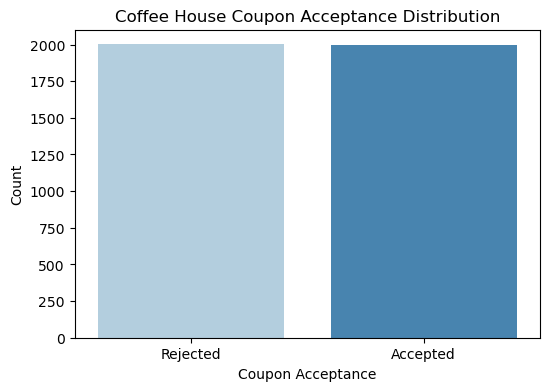

In [77]:

# Acceptance Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Y", data=coffee_coupons, hue="Y", legend=False, palette="Blues")  # Fix: Added hue="Y"
plt.xticks(ticks=[0,1], labels=["Rejected", "Accepted"])
plt.xlabel("Coupon Acceptance")
plt.ylabel("Count")
plt.title("Coffee House Coupon Acceptance Distribution")
plt.show()

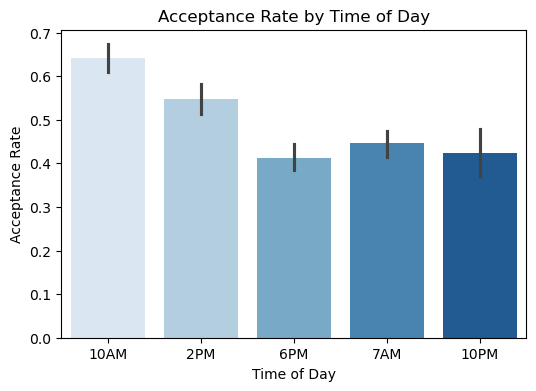

In [81]:
# Time of Day vs. Acceptance
plt.figure(figsize=(6,4))
sns.barplot(x="time", y="Y", data=coffee_coupons, estimator=lambda x: sum(x)/len(x), hue="time", legend=False, palette="Blues")  # Fix applied
plt.xlabel("Time of Day")
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Time of Day")
plt.show()


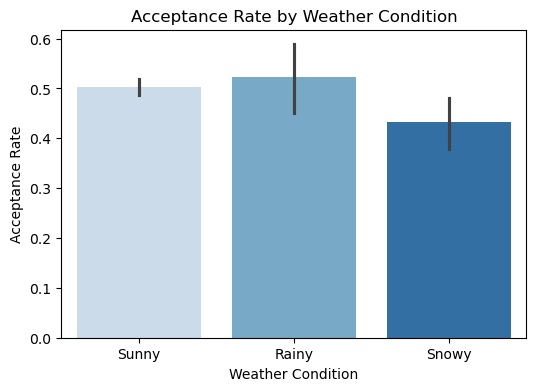

In [85]:
# Weather vs. Acceptance
plt.figure(figsize=(6,4))
sns.barplot(x="weather", y="Y", data=coffee_coupons, estimator=lambda x: sum(x)/len(x), hue="weather", legend=False, palette="Blues")  # Fix applied
plt.xlabel("Weather Condition")
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Weather Condition")
plt.show()


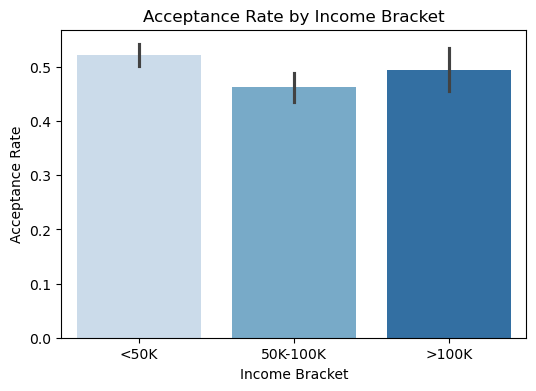

In [91]:
# Income vs. Acceptance
plt.figure(figsize=(6,4))
sns.barplot(x="income_bracket", y="Y", data=coffee_coupons, estimator=lambda x: sum(x)/len(x), hue="income_bracket", legend=False, palette="Blues")  # Fix applied
plt.xlabel("Income Bracket")
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Income Bracket")
plt.show()

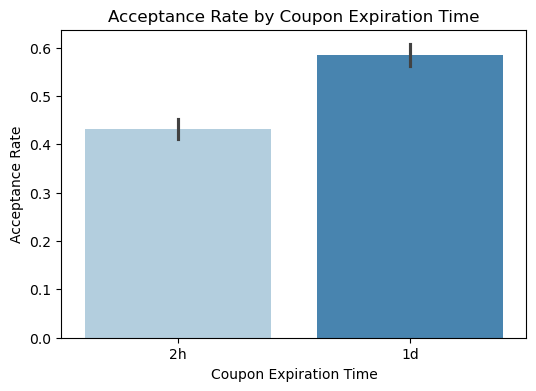

In [95]:
# Coupon Expiration vs. Acceptance
plt.figure(figsize=(6,4))
sns.barplot(x="expiration", y="Y", data=coffee_coupons, estimator=lambda x: sum(x)/len(x), hue="expiration", legend=False, palette="Blues")  # Fix applied
plt.xlabel("Coupon Expiration Time")
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Coupon Expiration Time")
plt.show()

### Hypothesis on Drivers Who Accepted Coffee House Coupons

#### 1. Morning and Midday Coffee Drinkers Are More Likely to Accept Coupons  
- The highest acceptance rates were observed at **10 AM (64.07%)** and **2 PM (54.79%)**.  
- This suggests that **coffee consumption is most frequent in the morning and early afternoon**, making these the best times to offer discounts.

#### 2. Weather Conditions Influence Coffee Coupon Acceptance  
- Acceptance rates were slightly higher on **Rainy days (52.21%)**, followed by **Sunny (50.36%)** and **Snowy (43.23%)**.  
- This suggests that drivers might be **more likely to stop for coffee on days that it is not snowing/snowy**.

#### 3. Lower-Income Individuals Are More Receptive to Coffee Discounts  
- Drivers earning less than 50K had the highest acceptance rate (**52.25%**), compared to **49.44%** for those earning over 100K.  
- This indicates that **budget-conscious consumers** may be more likely to take advantage of coffee shop coupons.

#### 4. Coupons with Longer Expiration Are More Effective  
- **1-Day expiration coupons (58.39%)** were accepted more than **2-Hour expiration coupons (43.20%)**.  
- This suggests that **giving drivers more time to redeem a coffee coupon increases the likelihood of acceptance**.

### **Final Hypothesis:**  
Drivers are **more likely to accept Coffee House coupons in the morning and early afternoon, particularly when it is not snowing. Lower-income individuals tend to be more receptive to coffee discounts, and coupons with longer expiration times increase the likelihood of acceptance.**